In [1]:
__author__ = "me"
__date__ = "2016_02_01"


import matplotlib
matplotlib.use('Agg')


%pylab inline


import matplotlib.pyplot as plt

import sqlite3
import datetime
import dateutil.parser
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

import os
import ast

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getSQLiteTweets(path):
    '''gets all data as tuple'''
    conn = sqlite3.connect(path)
    data = conn.cursor().execute('SELECT * FROM tweets').fetchall() ## all but raw data
    conn.close()
    return data

def getDF(path):
    data = getSQLiteTweets(path)
    columns = ('id','timestamp','lon', 'lat', 'tweet', 'user_id', 'rtwts', 'fvrts', 'application', 'source')
    
    return pd.DataFrame(data, columns=columns )
    

In [3]:
def toGeoDataFrame(df, lat='Latitude',lon='Longitude'):
    '''dataframe to geodataframe'''
    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df 

In [4]:
path = '/Users/casy/Dropbox/CUSP/GRA/QQ_GRA/CUSP_QC_twitter_scripts/data/out_DB/2016_02_06_MERGED_ALL.db'
df = getDF(path)

In [5]:
df['ts'] = pd.to_datetime(df.timestamp, unit='s')

In [6]:
df.head(2)

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts
0,662012596569018368,1446689077,40.626242,-74.075596,"Flood Control Staten Island, NY $50 off Emerge...",128961312,NaN,NaN,None,twitter1.db,2015-11-05 02:04:37
1,662012914115612672,1446689152,40.663992,-74.210701,We're #hiring! Read about our latest #job open...,28447324,NaN,NaN,None,twitter1.db,2015-11-05 02:05:52


## Records total

In [7]:
df.shape

(642016, 11)

## Time Range

In [8]:
df.ts.describe()

count                  642016
unique                 560203
top       2015-11-19 19:53:42
freq                       23
first     2015-11-05 02:04:37
last      2016-02-06 21:41:13
Name: ts, dtype: object

## Sources

In [9]:
df.source.value_counts()

twitter1.db              626920
gnip                      13029
2016_02__6_twitter.db      1777
twitter2.db                 221
twitter copy.db              69
Name: source, dtype: int64

## APPS

In [10]:
df.application.value_counts().head(20)

Instagram                      9164
Foursquare                     1313
511NY-Tweets                    448
Twitter for Android             341
Twitter for iPhone              267
Squarespace                     252
dlvr.it                         250
Tweetbot for iΟS                145
TTN NYC traffic                 111
COS App                          93
Twitter for Android Tablets      88
Twitter for Windows Phone        60
TweetCaster for Android          49
twitterfeed                      42
Path                             38
Personal CLI Twitter Api         33
Tweetlogix                       28
Untappd                          27
Beer Menus                       26
Cities                           23
Name: application, dtype: int64

## USERS

In [11]:
uCount = df.user_id.value_counts()

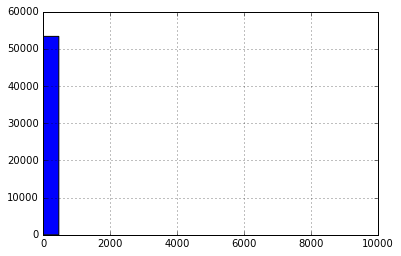

In [12]:
uCount[uCount>1].hist(bins=20)

In [13]:
len(uCount)

96499

In [14]:
len(uCount[uCount>1])

53404

In [15]:
uCount.describe()

count    96499.000000
mean         6.653084
std         60.533693
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       9371.000000
Name: user_id, dtype: float64

In [16]:
df.user_id.value_counts().head(3)

50706690    9371
52272942    9113
42640432    4816
Name: user_id, dtype: int64

In [17]:
df[df.user_id==42640432].head(3)

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts
142,662036578177409024,1446694794,40.76878,-74.01686,Bridge &amp; tunnel information in 1A. Hudson ...,42640432,NaN,NaN,None,twitter1.db,2015-11-05 03:39:54
550,662043351022092288,1446696409,40.61235,-74.15368,"Accident, two lanes blocked in #StatenIsland:O...",42640432,NaN,NaN,None,twitter1.db,2015-11-05 04:06:49
603,662044177786531840,1446696606,40.61235,-74.15368,Accident cleared in #StatenIsland:OnTheS.i.Exp...,42640432,NaN,NaN,None,twitter1.db,2015-11-05 04:10:06


## Timeline

In [18]:
dft = df[['ts','id']].set_index('ts').resample('D', how='count')

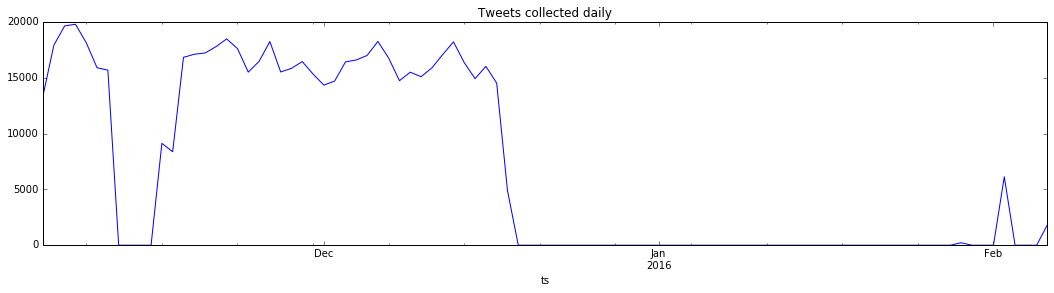

In [19]:
dft.plot(figsize=(18,4), legend=0, title='Tweets collected daily');

/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=16837.0, right=16837.0
  'left=%s, right=%s') % (left, right))


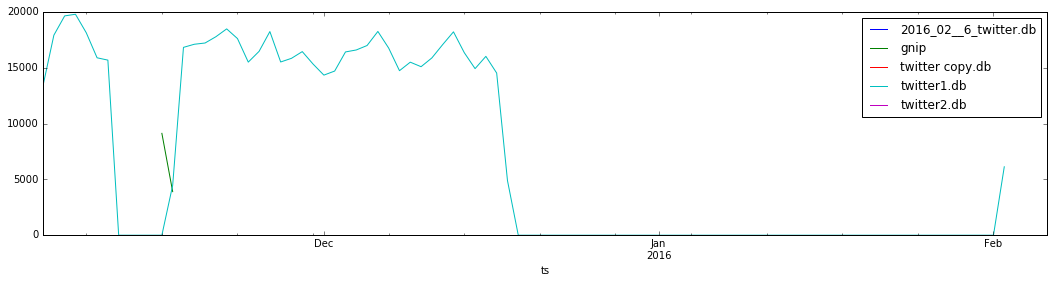

In [20]:
fig, ax = plt.subplots(figsize=(18,4))
lbls = []
for name, g in df.groupby('source'):
    lbls.append(name)
    f = g[['ts','id']].set_index('ts').resample('D', how='count')
    f.plot(ax=ax, label=name)

ax.legend(labels=lbls)

## Average_Week 15m basis

In [21]:
df['weekday'] = df['ts'].apply(lambda x: x.weekday())

In [22]:
df.head()

,id,timestamp,lon,lat,tweet,user_id,rtwts,fvrts,application,source,ts,weekday
0,662012596569018368,1446689077,40.626242,-74.075596,"Flood Control Staten Island, NY $50 off Emerge...",128961312,NaN,NaN,None,twitter1.db,2015-11-05 02:04:37,3
1,662012914115612672,1446689152,40.663992,-74.210701,We're #hiring! Read about our latest #job open...,28447324,NaN,NaN,None,twitter1.db,2015-11-05 02:05:52,3
2,662013116390109184,1446689201,40.592877,-74.274952,Want to work at Macy's Retail? We're #hiring i...,28480310,NaN,NaN,None,twitter1.db,2015-11-05 02:06:41,3
3,662013252549935104,1446689233,40.619148,-74.021759,Fall feels 🍁 #salvocapellisalon @ Salvo Capel...,550593958,NaN,NaN,None,twitter1.db,2015-11-05 02:07:13,3
4,662014669104640000,1446689571,40.630363,-74.106072,Can you recommend anyone for this #job? Shift ...,22454315,NaN,NaN,None,twitter1.db,2015-11-05 02:12:51,3


## TIME grouping

In [23]:
s = df[['id', 'ts']].set_index('ts').resample('15Min', how='count')

In [24]:
s.reset_index(inplace=1)
s['id'] = s['id'].astype(float)


s['wd'] = s['ts'].dt.weekday
s['hour'] = s['ts'].dt.hour
s['minute'] = s['ts'].dt.minute

sg = s.groupby(['wd', 'hour', 'minute']).agg('mean')
sg.reset_index(inplace=1)

In [28]:
sg.head()

,wd,hour,minute,id
0,0,0,0,125.615385
1,0,0,15,113.384615
2,0,0,30,120.615385
3,0,0,45,126.230769
4,0,1,0,116.307692


In [29]:
sg['timestamp'] = sg.apply(lambda x: datetime.datetime(year=2015, 
                                                       month=1, 
                                                       day=(int(x.wd)+1), 
                                                       hour=int(x.hour), 
                                                       minute=int(x.minute)), 1)

In [30]:
sg.head()

,wd,hour,minute,id,timestamp
0,0,0,0,125.615385,2015-01-01 00:00:00
1,0,0,15,113.384615,2015-01-01 00:15:00
2,0,0,30,120.615385,2015-01-01 00:30:00
3,0,0,45,126.230769,2015-01-01 00:45:00
4,0,1,0,116.307692,2015-01-01 01:00:00


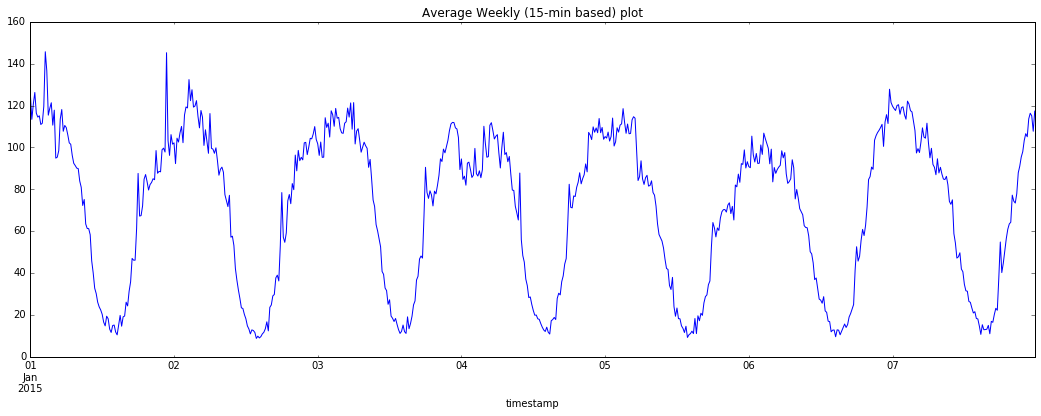

In [31]:
sg[['id', 'timestamp']].set_index('timestamp').plot(figsize=(18,6), legend=0, title='Average Weekly (15-min based) plot');

In [ ]:
def averageWeek(df, ax):
    '''calculate average week on ts'''
    
    s = df[['id', 'ts']].set_index('ts').resample('15Min', how='count')
    s.reset_index(inplace=1)
    s['id'] = s['id'].astype(float)

    s['wd'] = s['ts'].dt.weekday
    s['hour'] = s['ts'].dt.hour
    s['minute'] = s['ts'].dt.minute

    sg = s.groupby(['wd', 'hour', 'minute']).agg('mean')
    sg.reset_index(inplace=1)
    
    sg['timestamp'] = sg.apply(lambda x: datetime.datetime(year=2015, 
                                                       month=1, 
                                                       day=(int(x.wd)+1), 
                                                       hour=int(x.hour), 
                                                       minute=int(x.minute)), 1)
    
    sg[['id', 'timestamp']].set_index('timestamp')
                           .plot(ax=ax);

## Geography

In [44]:
gdf  = toGeoDataFrame(df, lat='lon',lon='lat')

In [45]:
zipPath = '/Users/casy/Dropbox/CUSP/GRA/QQ_GRA/CUSP_QC_twitter_scripts/data/misk/nyc-zip-code-tabulation-areas-polygons.geojson'

In [46]:
zips = gp.read_file(zipPath)

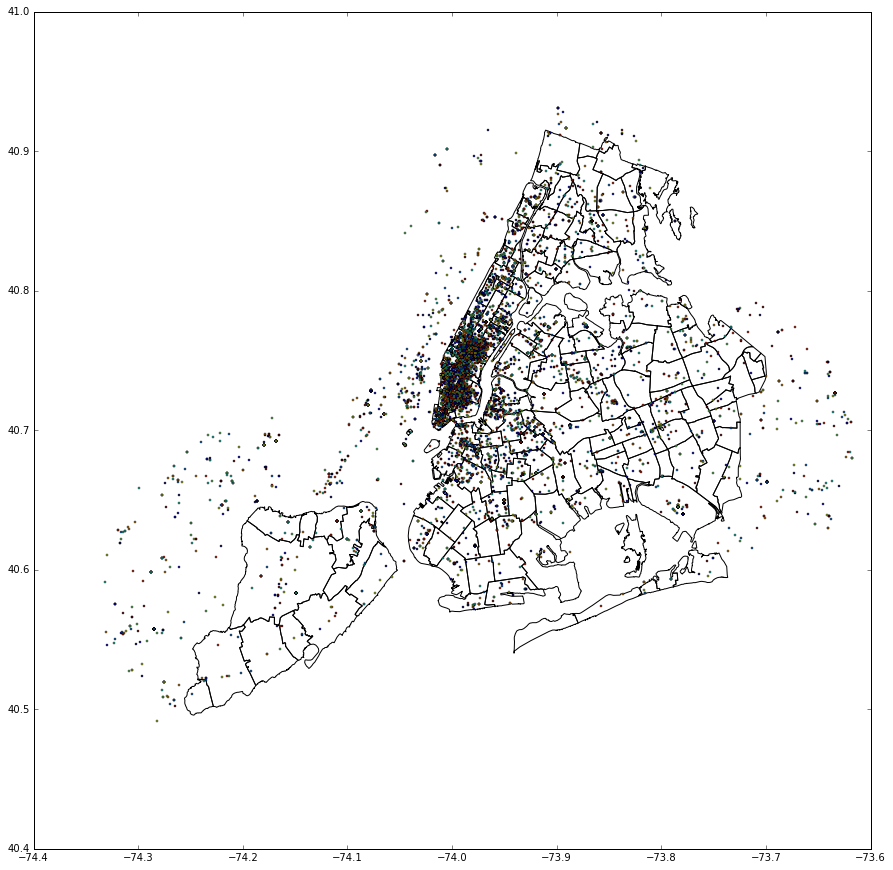

In [48]:
fig,ax = plt.subplots(figsize=(15,15))
zips.plot(alpha=0, ax=ax)
gdf[-10000:].plot(ax=ax)